In [1]:
import os
import random
import pandas as pd

# Set path for file
csvpath = os.path.join("loan.csv")
print(csvpath)

loan.csv


In [2]:
loans_df = pd.read_csv(csvpath)
loans_df.head()

C:\Users\jener\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (19,47,55,112,123,124,125,128,129,130,133,139,140,141) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pertinent_loans_df = loans_df[[ "annual_inc", "loan_amnt", "term", "int_rate", "total_pymnt", "issue_d", "addr_state", "zip_code", "dti"]]
pertinent_loans_df

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti
0,55000.0,2500,36 months,13.56,167.020000,Dec-2018,NY,109xx,18.24
1,90000.0,30000,60 months,18.94,1507.110000,Dec-2018,LA,713xx,26.52
2,59280.0,5000,36 months,17.97,353.890000,Dec-2018,MI,490xx,10.51
3,92000.0,4000,36 months,18.94,286.710000,Dec-2018,WA,985xx,16.74
4,57250.0,30000,60 months,16.14,1423.210000,Dec-2018,MD,212xx,26.35
...,...,...,...,...,...,...,...,...,...
2260663,58000.0,12000,60 months,14.08,5360.960000,Oct-2017,VT,054xx,20.88
2260664,30000.0,12000,60 months,25.82,14499.802172,Oct-2017,OR,971xx,19.28
2260665,64000.0,10000,36 months,11.99,5306.940000,Oct-2017,IL,603xx,12.96
2260666,60000.0,12000,60 months,21.45,5207.290000,Oct-2017,AK,996xx,30.82


In [4]:
pertinent_loans_df["annual_inc"].max()

110000000.0

In [5]:
# Create the bins in which annual_inc will be held, based on tax brackets
bins = [0, 9700, 39475, 84200, 160725, 204100, 510300, 110000000]


# Create the names for the four bins
income_tiers = ["Tier_One", "Tier_Two", "Tier_Three", "Tier_Four", "Tier_Five", "Tier_Six", "Tier_Seven"]

In [6]:
a = pd.cut(pertinent_loans_df["annual_inc"], bins, labels=income_tiers)
a.head()

0    Tier_Three
1     Tier_Four
2    Tier_Three
3     Tier_Four
4    Tier_Three
Name: annual_inc, dtype: category
Categories (7, object): [Tier_One < Tier_Two < Tier_Three < Tier_Four < Tier_Five < Tier_Six < Tier_Seven]

In [7]:
pertinent_loans_df["tier_group"] = a
pertinent_loans_df.head()

C:\Users\jener\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
0,55000.0,2500,36 months,13.56,167.02,Dec-2018,NY,109xx,18.24,Tier_Three
1,90000.0,30000,60 months,18.94,1507.11,Dec-2018,LA,713xx,26.52,Tier_Four
2,59280.0,5000,36 months,17.97,353.89,Dec-2018,MI,490xx,10.51,Tier_Three
3,92000.0,4000,36 months,18.94,286.71,Dec-2018,WA,985xx,16.74,Tier_Four
4,57250.0,30000,60 months,16.14,1423.21,Dec-2018,MD,212xx,26.35,Tier_Three


In [8]:
# Create a GroupBy object based upon "View Group"
loan_group = pertinent_loans_df.groupby("tier_group")

# Find how many rows fall into each bin
print(loan_group["annual_inc"].count())

# Get the average of each column within the GroupBy object
loan_group[["int_rate", "loan_amnt", "annual_inc"]].mean()

tier_group
Tier_One         2954
Tier_Two       343095
Tier_Three    1196274
Tier_Four      604591
Tier_Five       59806
Tier_Six        48894
Tier_Seven       3383
Name: annual_inc, dtype: int64


,int_rate,loan_amnt,annual_inc
tier_group,,,
Tier_One,14.813074,11096.267773,6.529720e+03
Tier_Two,13.962959,8677.464842,2.989422e+04
Tier_Three,13.252005,13711.771613,5.970080e+04
Tier_Four,12.506046,19535.365230,1.101832e+05
Tier_Five,11.945691,23553.136809,1.814288e+05
Tier_Six,11.709249,25823.841371,2.769104e+05
Tier_Seven,11.682722,26295.876441,1.068499e+06


100 loans from each tier 

In [9]:
##df.iloc[np.random.randint(1,1000), :]

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [12]:
# create new df for use on my branch - use groupby to get dti for each state
eric_state_avgs = pertinent_loans_df.groupby(['addr_state'])['dti'].mean()
eric_state_avgs_df = pd.DataFrame(eric_state_avgs)
eric_state_avgs_df.head()

,dti
addr_state,
AK,19.293226
AL,20.635317
AR,21.044830
AZ,19.119581
CA,17.233905


In [13]:
# get annual income for each state
annual_inc_by_state = pertinent_loans_df.groupby(['addr_state'])['annual_inc'].mean()
eric_state_avgs_df['annual_inc'] = annual_inc_by_state
eric_state_avgs_df.head()

,dti,annual_inc
addr_state,,
AK,19.293226,79823.042942
AL,20.635317,70854.753011
AR,21.044830,67588.154209
AZ,19.119581,74186.970789
CA,17.233905,83847.981089


In [14]:
#int_rate_by_state = pertinent_loans_df.groupby(['addr_state'])['int_rate'].mean()
#eric_state_avgs_df['int rate'] = int_rate_by_state
#eric_state_avgs_df.head()

In [15]:
#state_counts = pertinent_loans_df['addr_state'].value_counts()
#eric_state_avgs_df['loans per state'] = state_counts
#eric_state_avgs_df.head()

In [16]:
# look at percentage of state population taking loans


In [17]:
# had trouble with state index - created state column
eric_state_avgs_df["state_name"] = eric_state_avgs_df.index
eric_state_avgs_df.head()

,dti,annual_inc,state_name
addr_state,,,
AK,19.293226,79823.042942,AK
AL,20.635317,70854.753011,AL
AR,21.044830,67588.154209,AR
AZ,19.119581,74186.970789,AZ
CA,17.233905,83847.981089,CA


In [18]:
# resort column order
cols = eric_state_avgs_df.columns.tolist()
cols.insert(0, cols.pop(cols.index('state_name')))
eric_state_avgs_df = eric_state_avgs_df.reindex(columns= cols)
eric_state_avgs_df.head()

,state_name,dti,annual_inc
addr_state,,,
AK,AK,19.293226,79823.042942
AL,AL,20.635317,70854.753011
AR,AR,21.044830,67588.154209
AZ,AZ,19.119581,74186.970789
CA,CA,17.233905,83847.981089


In [19]:
# rename columns
eric_graph_df = eric_state_avgs_df.rename(columns = {
    'state_name':'State',
    'dti': 'Debt to Income Ratio',
    'annual_inc': 'Annual Income'
    })
eric_graph_df.head()

,State,Debt to Income Ratio,Annual Income
addr_state,,,
AK,AK,19.293226,79823.042942
AL,AL,20.635317,70854.753011
AR,AR,21.044830,67588.154209
AZ,AZ,19.119581,74186.970789
CA,CA,17.233905,83847.981089


Text(0, 0.5, 'Debt to Income Ratio')

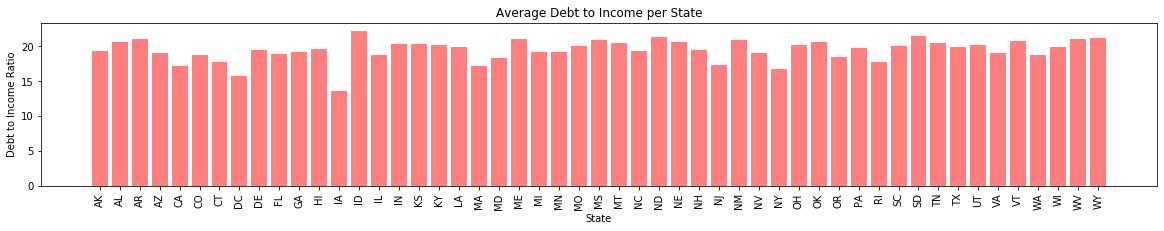

In [20]:
# bar graph for all 50 states showing debt to income

x_axis = np.arange(len(eric_graph_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize=(20,3))
plt.bar(x_axis, eric_graph_df["Debt to Income Ratio"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, eric_graph_df["State"], rotation="vertical")

plt.title("Average Debt to Income per State")
plt.xlabel("State")
plt.ylabel("Debt to Income Ratio")

Text(0, 0.5, 'Annual Income')

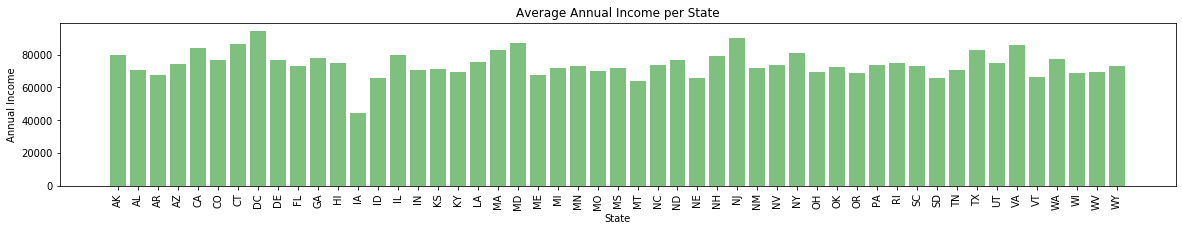

In [21]:
# bar graph for all 50 states showing avg annual income
plt.figure(figsize=(20,3))
plt.bar(x_axis, eric_graph_df["Annual Income"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, eric_graph_df["State"], rotation="vertical")

plt.title("Average Annual Income per State")
plt.xlabel("State")
plt.ylabel("Annual Income")

In [22]:
# set state columnn as index
eric_graph_df.set_index('State', inplace=True)
eric_graph_df.head()

,Debt to Income Ratio,Annual Income
State,,
AK,19.293226,79823.042942
AL,20.635317,70854.753011
AR,21.044830,67588.154209
AZ,19.119581,74186.970789
CA,17.233905,83847.981089


In [23]:
# formatting for columns and dropping IA (illegal in IA)
eric_graph_df.style.format({'Debt to Income Ratio': "{:.2f}%",'Annual Income': "${:,.2f}"})
eric_graph_df = eric_graph_df.drop('IA')

In [24]:
# sort states by dti - lowest 10 
state_smallest_avg_dti = eric_graph_df.nsmallest(11, ['Debt to Income Ratio'], keep='all')
state_smallest_avg_dti.style.format({'Debt to Income Ratio': "{:.2f}%",'Annual Income': "${:,.2f}"})

,Debt to Income Ratio,Annual Income
State,,
DC,15.73%,"$94,553.07"
NY,16.84%,"$81,057.05"
CA,17.23%,"$83,847.98"
MA,17.26%,"$82,788.66"
NJ,17.35%,"$89,920.51"
CT,17.73%,"$86,531.03"
RI,17.83%,"$74,607.28"
MD,18.30%,"$86,919.01"
OR,18.56%,"$68,737.99"


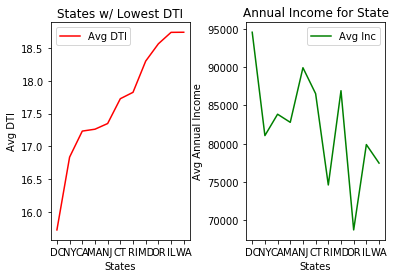

In [25]:
# graph states with lowest dti

x_data5 = state_smallest_avg_dti.index.values
y_data5 = state_smallest_avg_dti['Debt to Income Ratio']

x_data6 = state_smallest_avg_dti.index.values
y_data6 = state_smallest_avg_dti['Annual Income']

fig3 = plt.figure()
ax1 = fig3.add_subplot(1, 2, 1)
ax2 = fig3.add_subplot(1, 2, 2)
ax1.plot(x_data5, y_data5, color = 'r' ,label='Avg DTI')
ax2.plot(x_data6, y_data6, color = 'g' ,label='Avg Inc')
ax1.set_xlabel('States')
ax1.set_ylabel('Avg DTI')
ax1.set_title('States w/ Lowest DTI')
fig3.subplots_adjust(wspace=.4)
ax1.legend()
ax2.set_xlabel('States')
ax2.set_ylabel('Avg Annual Income')
ax2.set_title('Annual Income for State')
ax2.legend()

plt.savefig("Output/low10dti.png")

plt.show()

In [26]:
# sort states by dti income - highest 10
state_largest_avg_dti = eric_graph_df.nlargest(10, ['Debt to Income Ratio'], keep='all')
state_largest_avg_dti.style.format({'Debt to Income Ratio': "{:.2f}%",'Annual Income': "${:,.2f}"})

,Debt to Income Ratio,Annual Income
State,,
ID,22.26%,"$65,500.36"
SD,21.57%,"$65,890.03"
ND,21.42%,"$76,433.85"
WY,21.20%,"$72,941.19"
AR,21.04%,"$67,588.15"
ME,21.04%,"$67,713.61"
WV,21.03%,"$69,514.91"
MS,20.96%,"$71,625.13"
NM,20.96%,"$71,566.73"


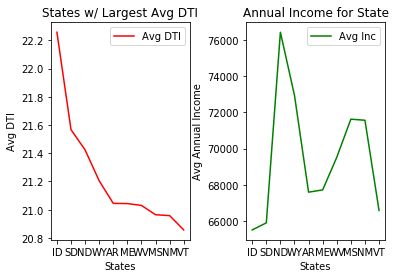

In [27]:
# graph states with highest dti

x_data1 = state_largest_avg_dti.index.values
y_data1 = state_largest_avg_dti['Debt to Income Ratio']

x_data2 = state_largest_avg_dti.index.values
y_data2 = state_largest_avg_dti['Annual Income']

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 2, 1)
ax2 = fig1.add_subplot(1, 2, 2)
ax1.plot(x_data1, y_data1, color = 'r', label='Avg DTI')
ax2.plot(x_data2, y_data2, color = 'g', label='Avg Inc')
ax1.set_xlabel('States')
ax1.set_ylabel('Avg DTI')
ax1.set_title('States w/ Largest Avg DTI')
fig1.subplots_adjust(wspace=.4)
ax1.legend()
ax2.set_xlabel('States')
ax2.set_ylabel('Avg Annual Income')
ax2.set_title('Annual Income for State')
ax2.legend()

plt.savefig("Output/high10dti.png")


plt.show()

In [28]:
# sort states by annual income - lowest 10 (drop IA, not legal in IA)
state_smallest_avg_annual_inc = eric_graph_df.nsmallest(11, ['Annual Income'], keep='all')
state_smallest_avg_annual_inc.style.format({'Debt to Income Ratio': "{:.2f}%",'Annual Income': "${:,.2f}"})

,Debt to Income Ratio,Annual Income
State,,
MT,20.56%,"$64,079.48"
ID,22.26%,"$65,500.36"
NE,20.61%,"$65,789.44"
SD,21.57%,"$65,890.03"
VT,20.86%,"$66,577.67"
AR,21.04%,"$67,588.15"
ME,21.04%,"$67,713.61"
OR,18.56%,"$68,737.99"
WI,19.93%,"$69,053.08"


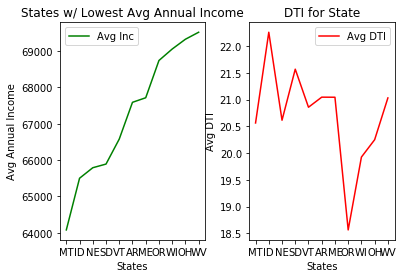

In [29]:
# graph states with lowest annual income

x_data7 = state_smallest_avg_annual_inc.index.values
y_data7 = state_smallest_avg_annual_inc['Annual Income']

x_data8 = state_smallest_avg_annual_inc.index.values
y_data8 = state_smallest_avg_annual_inc['Debt to Income Ratio']

fig4 = plt.figure()
ax1 = fig4.add_subplot(1, 2, 1)
ax2 = fig4.add_subplot(1, 2, 2)
ax1.plot(x_data7, y_data7, color = 'g' , label='Avg Inc')
ax2.plot(x_data8, y_data8, color = 'r' , label='Avg DTI')
ax1.set_xlabel('States')
ax1.set_ylabel('Avg Annual Income')
ax1.set_title('States w/ Lowest Avg Annual Income')
fig4.subplots_adjust(wspace=.3)
ax1.legend()
ax2.set_xlabel('States')
ax2.set_ylabel('Avg DTI')
ax2.set_title('DTI for State')
ax2.legend()

plt.savefig("Output/low10inc.png")

plt.show()

In [30]:
# sort states by annual income - highest 10
state_largest_avg_annual_inc = eric_graph_df.nlargest(10, ['Annual Income'], keep='all')
state_largest_avg_annual_inc.style.format({'Debt to Income Ratio': "{:.2f}%",'Annual Income': "${:,.2f}"})

,Debt to Income Ratio,Annual Income
State,,
DC,15.73%,"$94,553.07"
NJ,17.35%,"$89,920.51"
MD,18.30%,"$86,919.01"
CT,17.73%,"$86,531.03"
VA,19.05%,"$86,071.97"
CA,17.23%,"$83,847.98"
MA,17.26%,"$82,788.66"
TX,19.89%,"$82,728.81"
NY,16.84%,"$81,057.05"


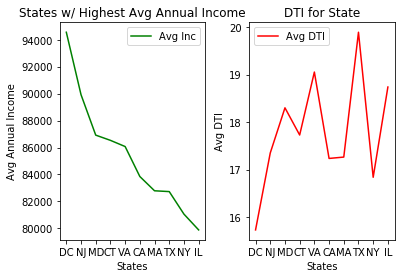

In [31]:
# graph states with lowest annual income

x_data3 = state_largest_avg_annual_inc.index.values
y_data3 = state_largest_avg_annual_inc['Annual Income']

x_data4 = state_largest_avg_annual_inc.index.values
y_data4 = state_largest_avg_annual_inc['Debt to Income Ratio']

fig2 = plt.figure()
ax1 = fig2.add_subplot(1, 2, 1)
ax2 = fig2.add_subplot(1, 2, 2)
ax1.plot(x_data3, y_data3, color = 'g', label='Avg Inc')
ax2.plot(x_data4, y_data4, color = 'r', label='Avg DTI')
ax1.set_xlabel('States')
ax1.set_ylabel('Avg Annual Income')
ax1.set_title('States w/ Highest Avg Annual Income')
fig2.subplots_adjust(wspace=.3)
ax1.legend()
ax2.set_xlabel('States')
ax2.set_ylabel('Avg DTI')
ax2.set_title('DTI for State')
ax2.legend()

plt.savefig("Output/high10inc.png")

plt.show()

In [32]:
# add column w/ total loan counts by state
state_counts = pertinent_loans_df['addr_state'].value_counts()
eric_graph_df['Loans per State'] = state_counts
eric_graph_df.head()

,Debt to Income Ratio,Annual Income,Loans per State
State,,,
AK,19.293226,79823.042942,5231
AL,20.635317,70854.753011,27284
AR,21.044830,67588.154209,17074
AZ,19.119581,74186.970789,53777
CA,17.233905,83847.981089,314533


In [33]:
# sort by 10 largest loans per state
lar_state_loans_distributed_vs_annual_inc = eric_graph_df.nlargest(10, ['Loans per State'], keep='all')
lar_state_loans_distributed_vs_annual_inc

,Debt to Income Ratio,Annual Income,Loans per State
State,,,
CA,17.233905,83847.981089,314533
NY,16.836901,81057.048011,186389
TX,19.894080,82728.814021,186335
FL,18.933998,73171.611676,161991
IL,18.739347,79884.922110,91173
NJ,17.349175,89920.509769,83132
PA,19.716737,73940.352221,76939
OH,20.249965,69322.612410,75132
GA,19.261108,77857.573627,74196


In [34]:
# sort by 10 largest loans per state
sm_state_loans_distributed_vs_annual_inc = eric_graph_df.nsmallest(11, ['Loans per State'], keep='all')
sm_state_loans_distributed_vs_annual_inc

,Debt to Income Ratio,Annual Income,Loans per State
State,,,
ND,21.423702,76433.851520,3591
ID,22.257667,65500.361291,4308
SD,21.567370,65890.027114,4549
WY,21.204493,72941.193519,4748
VT,20.856771,66577.665989,4937
ME,21.043385,67713.611842,4974
AK,19.293226,79823.042942,5231
DC,15.727175,94553.070816,5356
MT,20.562571,64079.482097,6299


In [35]:
# need to compute population ratios in order to complete higher income and states

In [36]:
sample3 = pertinent_loans_df.sample(100)
sample3.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
695777,42000.0,16000,60 months,9.16,11660.16,Mar-2016,UT,841xx,19.33,Tier_Three
427925,50000.0,12800,36 months,14.07,4807.00,Feb-2018,LA,700xx,23.29,Tier_Three
626814,29000.0,12000,36 months,16.29,13615.25,Jun-2016,TX,778xx,23.47,Tier_Two
430872,85000.0,16800,36 months,9.93,5974.54,Feb-2018,MI,483xx,33.94,Tier_Four
1160093,100000.0,6000,36 months,13.99,3083.03,Jul-2015,MI,490xx,23.11,Tier_Four


In [37]:
population = pertinent_loans_df["dti"].mean()
population

18.82419643667267

In [38]:
new_df = pertinent_loans_df[pertinent_loans_df["addr_state"] == "CA"]
new_df.head()

,annual_inc,loan_amnt,term,int_rate,total_pymnt,issue_d,addr_state,zip_code,dti,tier_group
20,65000.0,10000,36 months,13.56,668.00,Dec-2018,CA,937xx,10.62,Tier_Three
56,110000.0,14400,60 months,14.47,659.82,Dec-2018,CA,920xx,10.83,Tier_Four
64,98500.0,20000,36 months,13.56,1335.98,Dec-2018,CA,946xx,9.06,Tier_Four
65,161000.0,29450,36 months,8.19,1830.78,Dec-2018,CA,933xx,10.99,Tier_Five
68,52000.0,15500,36 months,10.72,996.95,Dec-2018,CA,925xx,16.66,Tier_Three


In [39]:
type(new_df['dti'])

pandas.core.series.Series

In [40]:


def gendata(loc=0):
    population = pertinent_loans_df["int_rate"]
    sample3 = new_df['int_rate']
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample3)), sample3, label="sample")
    plt.legend()
    
       # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 10, density=True, alpha=0.7, label="population")
    plt.hist(sample3, 10, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample3.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    plt.savefig("Output/ttest_int_rate.png")
    
    return population, sample3

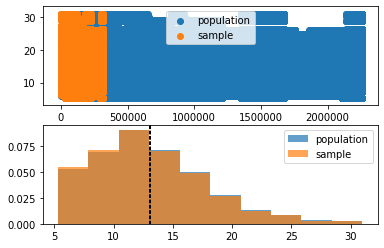

In [41]:
population, sample3 = gendata()

In [ ]:
population = population.dropna(how= "any") 
sample3 = sample3.dropna(how="any")

In [ ]:
stats.ttest_1samp(sample3, population.mean())